In [1]:
from flaskexample.perfume_recommendation import Fragrance_Retrieve_Model

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/biqiongyu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/biqiongyu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
gre = Fragrance_Retrieve_Model()

/anaconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/anaconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/anaconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'Se

In [3]:
#pick the products with "Fragrance Family" label
import pandas as pd
cluster_list = pd.notna(gre.df["Fragrance Family"])
cluster_df = gre.df.loc[cluster_list]
cluster_df.reset_index(inplace=True)
print(cluster_df.shape)
cluster_df.head()

(169, 15)


,index,name,product_id,rating,description,product_image_url,review_text_combine,brand,price,Fragrance Family,Type,Key Notes,About,text_tot,display
0,1,1 Million Lucky,P431565,4.76,Fragrance Family: Earthy & WoodyScent Type: Wa...,https://www.sephora.com/productimages/sku/s203...,"Everytime I spray this on in the morning, I'm ...",Paco Rabanne,$70.00,Earthy & Woody Scent,Warm Woods,"Hazelnut, Green Plum, Cedar","With unlimited potential and endless fun, lif...","Hazelnut, Green Plum, Cedar With unlimited p...","With unlimited potential and endless fun, lif..."
1,4,ALLURE HOMME SPORT EAU EXTRÊME Eau de Parfum,P377719,5.00,Fragrance Family: Earthy & WoodyScent Type: Wa...,https://www.sephora.com/productimages/sku/s141...,This is one of my favorites (besides Polo Red)...,CHANEL,$95.00,Earthy & Woody Scent,Warm Woods,"Mandarin, Cypress, Tonka Bean","Allure to the extreme. A powerful, dynamic, a...","Mandarin, Cypress, Tonka Bean Allure to the ...","Allure to the extreme. A powerful, dynamic, a..."
2,5,ALLURE HOMME SPORT Eau de Toilette,P70400,5.00,Fragrance Family: FreshScent Type: Fresh Aquat...,https://www.sephora.com/productimages/sku/s772...,I am extremely picky with my colognes and woul...,CHANEL,$75.00,Fresh Scent,Fresh Aquatics,"Mandarin, Cedar, White Musk","Allure in motion. More than a fragrance, ALLU...","Mandarin, Cedar, White Musk Allure in motion...","Allure in motion. More than a fragrance, ALLU..."
3,6,Acqua Di Gio Pour Homme,P12430,4.82,Fragrance Family: FreshScent Type: Fresh Aquat...,https://www.sephora.com/productimages/sku/s397...,i love the smell i keep on hugging my husband ...,Giorgio Armani Beauty,$68.00,Fresh Scent,Fresh Aquatics,"Bergamont, Rosemary",A resolutely masculine fragrance born from th...,"Bergamont, Rosemary A resolutely masculine f...",A resolutely masculine fragrance born from th...
4,7,Acqua Di Gio Profumo,P398665,4.71,Fragrance Family: Earthy & WoodyScrent Type: C...,https://www.sephora.com/productimages/sku/s173...,I bought this cologne for my boyfriend and it ...,Giorgio Armani Beauty,$75.00,Earthy & Woody Scent,Citrus & Woods,"Incense, Sea Salt","Woody, aromatic, and aquatic, Acqua Di Giò Pr...","Incense, Sea Salt Woody, aromatic, and aquat...","Woody, aromatic, and aquatic, Acqua Di Giò Pr..."


In [4]:
#get lsi embeddings, get only the products with "Fragrance Family"
lsi_matrix = gre.lsi_matrix.reset_index().loc[cluster_list]
lsi_matrix.reset_index(inplace = True)
lsi_matrix.drop(['name','index'], axis=1,inplace=True)
lsi_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.183082,0.179645,0.007961,0.002281,-0.011931,-0.007423,-0.014003,-0.005371,0.006768,-0.017325,...,-0.214369,0.145128,-0.051369,-0.051401,-0.129629,0.079632,-0.015159,0.064932,0.009753,0.080314
1,-0.093629,0.076530,0.001601,-0.001229,0.010269,-0.007969,0.009088,0.025360,-0.018444,0.023730,...,0.045021,0.156737,-0.018754,-0.196991,-0.012910,0.100225,-0.003332,0.013801,-0.091807,0.018224
2,-0.190361,0.233265,0.009187,0.004252,-0.018382,0.003388,0.001492,0.006048,0.003028,-0.007940,...,-0.061137,-0.046195,-0.180052,0.429094,-0.396620,-0.046347,-0.094228,0.117564,-0.069445,0.000193
3,-0.460941,0.585228,0.033553,-0.014866,-0.045657,0.058759,-0.012012,-0.009275,0.033242,-0.024913,...,0.027830,-0.014800,-0.003360,-0.009268,0.015667,0.013922,0.008906,-0.007465,-0.003913,0.031718
4,-0.114377,0.141793,0.030977,-0.047550,-0.001882,0.036510,0.010291,-0.002063,0.032322,-0.006774,...,-0.049630,0.007453,0.012330,0.040452,-0.119122,-0.031712,0.025792,0.020810,-0.086727,0.187552


In [5]:
#get doc2vec embeddings
doctovec_matrix = gre.doctovec_feature_matrix.reset_index().loc[cluster_list]
doctovec_matrix.reset_index(inplace=True)
doctovec_matrix.drop(['name','index'], axis=1,inplace=True)
doctovec_matrix.head()


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.330852,0.225811,0.194002,0.243792,0.100231,-0.282537,-0.364011,0.339874,-0.193019,-0.076803,...,-0.564919,0.440399,-0.525062,-1.185361,0.682527,-0.186386,0.121757,-0.715621,-0.174773,0.099017
1,0.138452,-0.422863,-0.278915,-0.854882,-0.499476,-0.458436,0.683694,0.816771,-0.075486,0.223557,...,0.364184,-0.967615,-0.102270,-0.736862,0.762166,-0.523752,-0.390263,0.299319,-0.244164,-0.173018
2,0.628232,-0.394024,0.245333,-0.055443,0.772109,0.647879,-0.547488,-0.055347,0.246780,-0.393903,...,0.641314,0.397872,-0.676714,-0.474582,0.035073,0.087014,-0.248078,-0.490892,-0.108177,-0.351266
3,0.498225,-0.058877,0.075340,-0.386896,-0.156554,-0.108395,-0.070640,0.309328,0.549877,-0.012813,...,-0.448465,-0.233864,-0.545428,-0.913077,0.591502,-0.455549,-0.201577,-0.319148,-0.431706,0.293900
4,-0.835425,0.738239,0.600516,-0.059139,-1.000363,0.116689,0.033149,-0.059957,0.197831,0.308690,...,-1.211496,-0.568566,-0.140313,-0.310205,0.819318,-0.280341,0.144934,0.065292,0.130793,0.032948


In [6]:
#calculate the similarity matrix
from sklearn.metrics.pairwise import cosine_similarity
lsi_similarities = cosine_similarity(lsi_matrix)
doctovec_similarities = cosine_similarity(doctovec_matrix)
tot_similarities = lsi_similarities*(0.7)+doctovec_similarities*(0.3)
tot_similarities

array([[ 0.99999995, -0.02817922,  0.15093304, ..., -0.00989225,
         0.12525045,  0.07560355],
       [-0.02817922,  0.99999995,  0.07227932, ...,  0.05676088,
         0.08936263, -0.02306745],
       [ 0.15093304,  0.07227932,  0.99999998, ...,  0.09482122,
         0.04925499,  0.00660178],
       ...,
       [-0.00989225,  0.05676088,  0.09482122, ...,  1.00000016,
         0.28604135,  0.12759625],
       [ 0.12525045,  0.08936263,  0.04925499, ...,  0.28604135,
         0.99999998,  0.2041894 ],
       [ 0.07560355, -0.02306745,  0.00660178, ...,  0.12759625,
         0.2041894 ,  1.00000007]])

## To cluster the perfume products into clusters using Kmeans

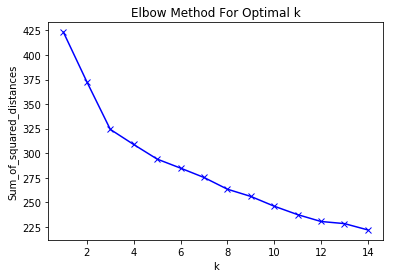

In [7]:
# find the best number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(tot_similarities)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [8]:
# KMeans clustering on the similarities matrix
kmeans_cluster = KMeans(n_clusters=10, init='k-means++').fit(tot_similarities)
kmeans_cluster.labels_

array([4, 3, 4, 4, 4, 4, 2, 2, 9, 2, 2, 2, 4, 4, 4, 1, 3, 1, 1, 3, 2, 0,
       7, 5, 1, 7, 7, 7, 7, 7, 7, 7, 3, 7, 5, 2, 2, 2, 2, 5, 5, 5, 5, 8,
       5, 9, 3, 2, 9, 6, 0, 2, 2, 7, 7, 7, 1, 1, 1, 1, 3, 0, 6, 7, 2, 3,
       3, 2, 2, 0, 2, 7, 3, 7, 3, 2, 8, 8, 8, 8, 3, 1, 7, 9, 0, 3, 1, 2,
       3, 4, 3, 3, 9, 3, 0, 5, 7, 8, 1, 2, 2, 3, 0, 6, 3, 9, 6, 2, 1, 6,
       7, 0, 2, 0, 6, 6, 3, 0, 3, 3, 3, 3, 9, 9, 9, 9, 9, 9, 2, 8, 6, 4,
       8, 3, 6, 6, 2, 4, 2, 6, 3, 2, 2, 2, 2, 8, 8, 8, 0, 3, 7, 3, 9, 6,
       0, 2, 0, 3, 4, 4, 4, 9, 9, 2, 6, 9, 6, 9, 3], dtype=int32)

In [9]:
cluster = 0 #flora scent
index = np.where(kmeans_cluster.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
21,Blackberry & Bay Cologne,Fresh Scent,Fresh Citrus & Fruitss
50,English Pear & Freesia Cologne,Floral Scent,Fruity Florals
61,Frangipani Flower Cologne,Floral Scent,Warm Floralss
69,Honeysuckle & Davana Cologne,Floral Scent,Warm Florals
84,Lime Basil & Mandarin Cologne,Fresh Scent,Fresh Citrus & Fruitss
94,Mimosa & Cardamom Cologne,Floral Scent,Powdery Florals
102,Nectarine Blossom & Honey Cologne,Floral Scent,Fruity Florals
111,Orange Blossom Cologne,Fresh Scent,Fresh Florals
113,Oud & Bergamot Cologne Intense,Warm & Spicy Scent,Cool Spices
117,Peony & Blush Suede Cologne,Floral Scent,Classic Florals


In [10]:
# cluster 1 
cluster = 1
index = np.where(kmeans_cluster.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
15,BONBON,Floral Scent,Fruity Florals
17,Black Opium,Warm & Spicy Scent,Warm & Sweet Gourmands
18,Black Orchid,Floral Scent,Warm Florals
24,CANDY,Warm & Spicy Scent,Warm & Sweet Gourmands
56,Flowerbomb,Warm & Spicy Scent,Warm & Sweet Gourmands
57,Flowerbomb Midnight,Floral Scent,Warm Florals
58,Flowerbomb Mini,Warm & Spicy Scent,Warm & Sweet Gourmands
59,Flowerbomb Nectar,Warm & Spicy Scent,Warm & Sweet Gourmands
81,La Vie Est Belle,Warm & Spicy Scent,Warm & Sweet Gourmands
86,Love Relentlessly,Floral Scent,Warm Floralss


In [11]:
# cluster 2 
cluster = 2
index = np.where(kmeans_cluster.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
6,Alien,Floral Scent,Warm Florals
7,Amazing Grace Ballet Rose Eau de Toilette,Floral Scent,Classic Floral
9,Angel,Warm & Spicy Scent,Warm & Sweet Gourmands
10,Aqua Allegoria Mandarine Basilic,Fresh Scent,Fresh Citrus & Fruits
11,B.,Fresh Scent,Fresh Florals
20,Black Tulip,Floral Scent,Warm Floralss
35,Chloé Rollerball,Floral Scent,Powdery Florals
36,Cleopatra,Floral Scent,Warm Floralss
37,Clémentine California Cologne Absolue Pure Per...,Fresh Scent,Fresh Citrus & Fruitss
38,Collection Azur - Cèdre Atlas,Earthy & Woody Scent,Citrus & Woods


In [12]:
# cluster 3 
cluster = 3
index = np.where(kmeans_cluster.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
1,ALLURE HOMME SPORT EAU EXTRÊME Eau de Parfum,Earthy & Woody Scent,Warm Woods
16,Beau de Jour,Earthy & Woody Scent,Earthy Greens & Herbs
19,"Black Phantom - ""Memento Mori""",Warm & Spicy Scent,Woody Spices
32,Candy Mini and Rollerball Set,Warm & Spicy Scent,Warm & Sweet Gourmands
46,Dolce Peony,Floral Scent,Fruity Florals
60,Flowerbomb Set,Warm & Spicy Scent,Warm & Sweet Gourmands
65,Good Girl Eau de Parfum Gift Set,Floral Scent,Warm Floralss
66,Good Girl Gone Bad,Floral Scent,Classic Florals
72,J'adore Eau de Parfum 3-Piece Set,Floral Scent,Fruity Florals
74,Jasmine Neroli Eau de Parfum,Floral Scent,Powdery Floral


In [13]:
# cluster 4 
cluster = 4
index = np.where(kmeans_cluster.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
0,1 Million Lucky,Earthy & Woody Scent,Warm Woods
2,ALLURE HOMME SPORT Eau de Toilette,Fresh Scent,Fresh Aquatics
3,Acqua Di Gio Pour Homme,Fresh Scent,Fresh Aquatics
4,Acqua Di Gio Profumo,Earthy & Woody Scent,Citrus & Woods
5,Acqua di Gio Absolu,Earthy & Woody Scent,Citrus & Woods
12,BLEU DE CHANEL Eau de Parfum,Earthy & Woody Scent,Warm Woods
13,BLEU DE CHANEL Eau de Toilette,Earthy & Woody Scent,Warm Woods
14,BLEU DE CHANEL PARFUM,Earthy & Woody Scent,Warm Woods
89,Luna Rossa Carbon,Earthy & Woody Scent,Warm Woods
131,Sauvage Eau de Parfum,Earthy & Woody Scent,Citrus & Woods


In [14]:
# cluster 5 warm & spicy scent
cluster = 5
index = np.where(kmeans_cluster.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
23,Bloom Eau de Parfum For Her Rollerball,Floral Scent,Classic Florals
34,Chloé Eau de Parfum,Floral Scent,Powdery Florals
39,Daisy,Floral Scent,Fruity Florals
40,Daisy Dream,Floral Scent,Fruity Florals
41,Daisy Eau So Fresh,Floral Scent,Fruity Florals
42,Daisy Love,Floral Scent,Warm Florals
44,Daisy Rollerball,Floral Scent,Fruity Florals
95,Miss Dior Blooming Bouquet,Floral Scent,Fruity Florals


In [15]:
# cluster 6 
cluster = 6
index = np.where(kmeans_cluster.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
49,Eau de Soleil Blanc,Fresh Scent,Fresh Florals
62,Fucking Fabulous,Warm & Spicy Scent,Woody Spice
103,Neroli Portofino,Fresh Scent,Fresh Citrus & Fruitss
106,Noir Extreme,Warm & Spicy Scent,Woody Spices
109,Ombre Leather,Warm & Spicy Scent,Woody Spices
114,Oud Wood,Warm & Spicy Scent,Cool Spices
115,Oud Wood Atomizer,Earthy & Woody Scent,Classic Woods
130,Santal Blush,Earthy & Woody Scent,Warm Woods
134,Soleil Blanc,Warm & Spicy Scent,Warm & Sweet Gourmands
135,Soleil Blanc Atomizer,Floral Scent,Warm Floralss


In [16]:
# cluster 7
cluster = 7
index = np.where(kmeans_cluster.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
22,Bloom Eau de Parfum For Her,Floral Scent,Classic Florals
25,CHANCE EAU FRAÎCHE Eau de Toilette,Fresh Scent,Fresh Fruity Florals
26,CHANCE EAU TENDRE Eau de Toilette,Fresh Scent,Fresh Fruity Florals
27,CHANCE EAU VIVE,Fresh Scent,Fresh Citrus & Fruitss
28,CHANCE Eau de Parfum,Warm & Spicy Scent,Warm Floralss
29,CHANCE Eau de Toilette,Floral Scent,Classic Florals
30,COCO MADEMOISELLE Eau de Parfum Intense,Floral Scent,Warm Florals
31,COCO MADEMOISELLE Eau de Toilette,Floral Scent,Fruity Florals
33,Chance Eau Tendre Eau de Parfum,Floral Scent,Fruity Florals
53,Flora By Gucci - Gorgeous Gardenia,Floral Scent,Fruity Florals


In [17]:
# cluster 8
cluster = 8
index = np.where(kmeans_cluster.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
43,Daisy Love Eau So Sweet,Floral Scent,Fruity Florals
76,KAYALI ELIXIR | 11,Floral Scent,Warm Floralss
77,KAYALI MUSK | 12,Floral Scent,Powdery Florals
78,KAYALI VANILLA | 28,Warm & Spicy Scent,Warm & Sweet Gourmands
79,L'Homme Cologne Bleue,Fresh Scent,Fresh Aquatics
97,Miu Miu Twist Eau de Parfum,Floral Scent,Fruity Florals
129,Saint Eau de Parfum,Floral Scent,Classic Floral
132,Sinner Eau de Parfum,Warm & Spicy Scent,Cool Spices
145,Vanilla Vibes,Fresh Scent,Fresh Florals
146,Vanilla Woods Eau de Parfum,Warm & Spicy Scent,Warm & Sweet Gourmands


In [18]:
# cluster 9
cluster = 9
index = np.where(kmeans_cluster.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
8,Amazing Grace Eau de Toilette,Floral Scent,Powdery Florals
45,Dolce Garden,Floral Scent,Warm Floralss
48,Eau Parfumée Au Thé Blanc,Earthy & Woody Scent,Citrus & Woods
83,Light Blue Sun Eau de Toilette,Fresh Scent,Fresh Florals
92,Magic Salty Flower,Fresh Scent,Fresh Florals
105,No.04 Bois de Balincourt Perfume Oil,Earthy & Woody Scent,Warm Woods
122,REPLICA Under the Lemon Trees Eau de Toilette,Fresh Scent,Fresh Citrus & Fruitss
123,Reserve Acqua Neroli,Fresh Scent,Fresh Florals
124,Reserve Rain,Fresh Scent,Fresh Aquatics
125,Reserve Skin,Warm & Spicy Scent,Warm & Sweet Gourmands


## DBSCAN directly on lsi_matrix

In [19]:
# try DBSCAN directly on lsi_matrix
from sklearn.cluster import DBSCAN
# cluster the data 
dbscan = DBSCAN(eps=0.805, min_samples = 4).fit(lsi_matrix)
dbscan.labels_

array([-1, -1, -1,  0,  0,  0, -1,  2, -1, -1,  0, -1,  0,  0,  0,  1, -1,
       -1,  0, -1, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        2,  2, -1,  0,  0,  2,  2,  2,  2,  3,  2,  0, -1, -1,  0,  0,  0,
       -1,  2,  4,  4,  4,  1,  1,  1,  1, -1,  0,  0,  0, -1, -1, -1,  4,
       -1,  0, -1,  0, -1,  0,  0, -1,  3,  3,  3,  3, -1,  1, -1,  0,  0,
       -1,  5,  2, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1, -1, -1, -1, -1,
        0,  0, -1, -1,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1, -1, -1, -1,  0,  0,  0,  0, -1,  2, -1, -1, -1, -1, -1,  0,  0,
       -1,  0, -1,  0, -1,  5,  5,  5,  0, -1, -1, -1,  0, -1, -1,  0, -1,
        0,  0, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,  0, -1])

In [20]:
# cluster 0 captures the Earthy & Woody Scent
cluster = 0
index = np.where(dbscan.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
3,Acqua Di Gio Pour Homme,Fresh Scent,Fresh Aquatics
4,Acqua Di Gio Profumo,Earthy & Woody Scent,Citrus & Woods
5,Acqua di Gio Absolu,Earthy & Woody Scent,Citrus & Woods
10,Aqua Allegoria Mandarine Basilic,Fresh Scent,Fresh Citrus & Fruits
12,BLEU DE CHANEL Eau de Parfum,Earthy & Woody Scent,Warm Woods
13,BLEU DE CHANEL Eau de Toilette,Earthy & Woody Scent,Warm Woods
14,BLEU DE CHANEL PARFUM,Earthy & Woody Scent,Warm Woods
18,Black Orchid,Floral Scent,Warm Florals
21,Blackberry & Bay Cologne,Fresh Scent,Fresh Citrus & Fruitss
22,Bloom Eau de Parfum For Her,Floral Scent,Classic Florals


In [21]:
# warm & spicy scent
cluster = 1
index = np.where(dbscan.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
15,BONBON,Floral Scent,Fruity Florals
24,CANDY,Warm & Spicy Scent,Warm & Sweet Gourmands
56,Flowerbomb,Warm & Spicy Scent,Warm & Sweet Gourmands
57,Flowerbomb Midnight,Floral Scent,Warm Florals
58,Flowerbomb Mini,Warm & Spicy Scent,Warm & Sweet Gourmands
59,Flowerbomb Nectar,Warm & Spicy Scent,Warm & Sweet Gourmands
81,La Vie Est Belle,Warm & Spicy Scent,Warm & Sweet Gourmands


In [22]:
#cluster 2 is a mixture of fresh and floral scent, mainly fruits/fruity
cluster = 2
index = np.where(dbscan.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
7,Amazing Grace Ballet Rose Eau de Toilette,Floral Scent,Classic Floral
34,Chloé Eau de Parfum,Floral Scent,Powdery Florals
35,Chloé Rollerball,Floral Scent,Powdery Florals
39,Daisy,Floral Scent,Fruity Florals
40,Daisy Dream,Floral Scent,Fruity Florals
41,Daisy Eau So Fresh,Floral Scent,Fruity Florals
42,Daisy Love,Floral Scent,Warm Florals
44,Daisy Rollerball,Floral Scent,Fruity Florals
52,Fleur de Parfum,Fresh Scent,Fresh Florals
87,Love Story,Floral Scent,Fruity Florals


In [23]:
# floral scent in cluster 3
cluster = 3
index = np.where(dbscan.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
43,Daisy Love Eau So Sweet,Floral Scent,Fruity Florals
76,KAYALI ELIXIR | 11,Floral Scent,Warm Floralss
77,KAYALI MUSK | 12,Floral Scent,Powdery Florals
78,KAYALI VANILLA | 28,Warm & Spicy Scent,Warm & Sweet Gourmands
79,L'Homme Cologne Bleue,Fresh Scent,Fresh Aquatics


## The hierarchy clustering is also tested, though the result is mixed.

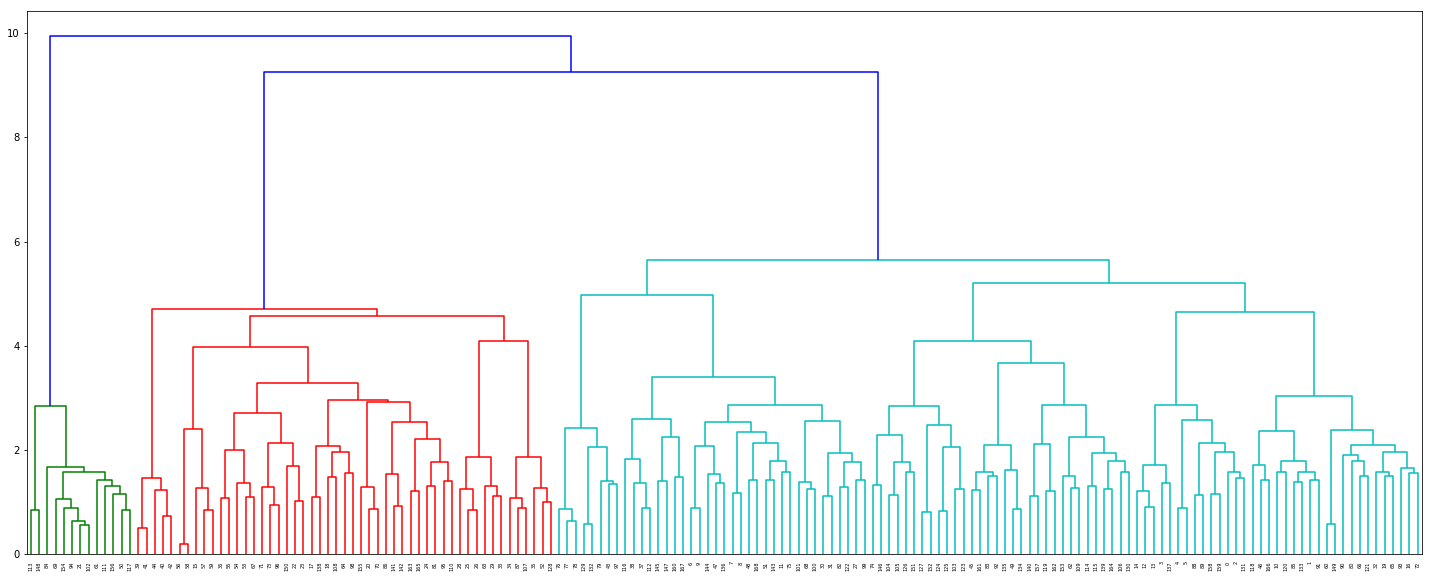

In [24]:
# try hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
%matplotlib inline

Z = linkage(tot_similarities, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)



In [33]:
from sklearn.cluster import AgglomerativeClustering

# cluster the data into 9 clusters
agg_clustering = AgglomerativeClustering(n_clusters=9,linkage='ward').fit(tot_similarities)
agg_clustering.labels_

array([8, 4, 8, 8, 8, 8, 2, 2, 2, 2, 4, 2, 8, 8, 8, 3, 4, 3, 3, 4, 3, 7,
       3, 3, 3, 1, 1, 2, 1, 1, 2, 2, 4, 1, 1, 1, 3, 2, 2, 6, 6, 6, 6, 5,
       6, 0, 4, 2, 2, 0, 7, 2, 1, 3, 3, 3, 3, 3, 3, 3, 4, 7, 0, 1, 3, 4,
       4, 3, 2, 7, 3, 3, 4, 3, 0, 2, 5, 5, 5, 5, 4, 3, 2, 0, 7, 4, 3, 1,
       8, 8, 4, 4, 0, 4, 7, 3, 3, 5, 3, 2, 2, 2, 7, 0, 0, 0, 0, 1, 3, 0,
       3, 7, 2, 7, 0, 0, 2, 7, 4, 0, 4, 4, 2, 0, 0, 0, 0, 0, 1, 5, 0, 8,
       5, 4, 0, 0, 2, 8, 3, 0, 0, 3, 3, 2, 2, 2, 0, 2, 7, 4, 3, 0, 0, 0,
       7, 3, 7, 0, 8, 8, 2, 0, 0, 3, 0, 3, 4, 2, 2])

In [34]:
cluster = 0
index = np.where(agg_clustering.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
45,Dolce Garden,Floral Scent,Warm Floralss
49,Eau de Soleil Blanc,Fresh Scent,Fresh Florals
62,Fucking Fabulous,Warm & Spicy Scent,Woody Spice
74,Jasmine Neroli Eau de Parfum,Floral Scent,Powdery Floral
83,Light Blue Sun Eau de Toilette,Fresh Scent,Fresh Florals
92,Magic Salty Flower,Fresh Scent,Fresh Florals
103,Neroli Portofino,Fresh Scent,Fresh Citrus & Fruitss
104,No.04 Bois de Balincourt Eau de Parfum,Earthy & Woody Scent,Warm Woods
105,No.04 Bois de Balincourt Perfume Oil,Earthy & Woody Scent,Warm Woods
106,Noir Extreme,Warm & Spicy Scent,Woody Spices


In [35]:
# earth & woody
cluster = 1
index = np.where(agg_clustering.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
25,CHANCE EAU FRAÎCHE Eau de Toilette,Fresh Scent,Fresh Fruity Florals
26,CHANCE EAU TENDRE Eau de Toilette,Fresh Scent,Fresh Fruity Florals
28,CHANCE Eau de Parfum,Warm & Spicy Scent,Warm Floralss
29,CHANCE Eau de Toilette,Floral Scent,Classic Florals
33,Chance Eau Tendre Eau de Parfum,Floral Scent,Fruity Florals
34,Chloé Eau de Parfum,Floral Scent,Powdery Florals
35,Chloé Rollerball,Floral Scent,Powdery Florals
52,Fleur de Parfum,Fresh Scent,Fresh Florals
63,GABRIELLE CHANEL Eau de Parfum,Floral Scent,Classic Florals
87,Love Story,Floral Scent,Fruity Florals


In [36]:
cluster = 2
index = np.where(agg_clustering.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
6,Alien,Floral Scent,Warm Florals
7,Amazing Grace Ballet Rose Eau de Toilette,Floral Scent,Classic Floral
8,Amazing Grace Eau de Toilette,Floral Scent,Powdery Florals
9,Angel,Warm & Spicy Scent,Warm & Sweet Gourmands
11,B.,Fresh Scent,Fresh Florals
27,CHANCE EAU VIVE,Fresh Scent,Fresh Citrus & Fruitss
30,COCO MADEMOISELLE Eau de Parfum Intense,Floral Scent,Warm Florals
31,COCO MADEMOISELLE Eau de Toilette,Floral Scent,Fruity Florals
37,Clémentine California Cologne Absolue Pure Per...,Fresh Scent,Fresh Citrus & Fruitss
38,Collection Azur - Cèdre Atlas,Earthy & Woody Scent,Citrus & Woods


In [37]:
cluster = 3
index = np.where(agg_clustering.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
15,BONBON,Floral Scent,Fruity Florals
17,Black Opium,Warm & Spicy Scent,Warm & Sweet Gourmands
18,Black Orchid,Floral Scent,Warm Florals
20,Black Tulip,Floral Scent,Warm Floralss
22,Bloom Eau de Parfum For Her,Floral Scent,Classic Florals
23,Bloom Eau de Parfum For Her Rollerball,Floral Scent,Classic Florals
24,CANDY,Warm & Spicy Scent,Warm & Sweet Gourmands
36,Cleopatra,Floral Scent,Warm Floralss
53,Flora By Gucci - Gorgeous Gardenia,Floral Scent,Fruity Florals
54,Flora by Gucci Eau de Parfum,Fresh Scent,Fresh Florals


In [38]:
cluster = 4
index = np.where(agg_clustering.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
1,ALLURE HOMME SPORT EAU EXTRÊME Eau de Parfum,Earthy & Woody Scent,Warm Woods
10,Aqua Allegoria Mandarine Basilic,Fresh Scent,Fresh Citrus & Fruits
16,Beau de Jour,Earthy & Woody Scent,Earthy Greens & Herbs
19,"Black Phantom - ""Memento Mori""",Warm & Spicy Scent,Woody Spices
32,Candy Mini and Rollerball Set,Warm & Spicy Scent,Warm & Sweet Gourmands
46,Dolce Peony,Floral Scent,Fruity Florals
60,Flowerbomb Set,Warm & Spicy Scent,Warm & Sweet Gourmands
65,Good Girl Eau de Parfum Gift Set,Floral Scent,Warm Floralss
66,Good Girl Gone Bad,Floral Scent,Classic Florals
72,J'adore Eau de Parfum 3-Piece Set,Floral Scent,Fruity Florals


In [39]:
cluster = 5
index = np.where(agg_clustering.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
43,Daisy Love Eau So Sweet,Floral Scent,Fruity Florals
76,KAYALI ELIXIR | 11,Floral Scent,Warm Floralss
77,KAYALI MUSK | 12,Floral Scent,Powdery Florals
78,KAYALI VANILLA | 28,Warm & Spicy Scent,Warm & Sweet Gourmands
79,L'Homme Cologne Bleue,Fresh Scent,Fresh Aquatics
97,Miu Miu Twist Eau de Parfum,Floral Scent,Fruity Florals
129,Saint Eau de Parfum,Floral Scent,Classic Floral
132,Sinner Eau de Parfum,Warm & Spicy Scent,Cool Spices


In [40]:
cluster = 6
index = np.where(agg_clustering.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
39,Daisy,Floral Scent,Fruity Florals
40,Daisy Dream,Floral Scent,Fruity Florals
41,Daisy Eau So Fresh,Floral Scent,Fruity Florals
42,Daisy Love,Floral Scent,Warm Florals
44,Daisy Rollerball,Floral Scent,Fruity Florals


In [41]:
cluster = 7
index = np.where(agg_clustering.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
21,Blackberry & Bay Cologne,Fresh Scent,Fresh Citrus & Fruitss
50,English Pear & Freesia Cologne,Floral Scent,Fruity Florals
61,Frangipani Flower Cologne,Floral Scent,Warm Floralss
69,Honeysuckle & Davana Cologne,Floral Scent,Warm Florals
84,Lime Basil & Mandarin Cologne,Fresh Scent,Fresh Citrus & Fruitss
94,Mimosa & Cardamom Cologne,Floral Scent,Powdery Florals
102,Nectarine Blossom & Honey Cologne,Floral Scent,Fruity Florals
111,Orange Blossom Cologne,Fresh Scent,Fresh Florals
113,Oud & Bergamot Cologne Intense,Warm & Spicy Scent,Cool Spices
117,Peony & Blush Suede Cologne,Floral Scent,Classic Florals


In [42]:
cluster = 8
index = np.where(agg_clustering.labels_==cluster)
cluster_df[['name','Fragrance Family','Type']].loc[index]

,name,Fragrance Family,Type
0,1 Million Lucky,Earthy & Woody Scent,Warm Woods
2,ALLURE HOMME SPORT Eau de Toilette,Fresh Scent,Fresh Aquatics
3,Acqua Di Gio Pour Homme,Fresh Scent,Fresh Aquatics
4,Acqua Di Gio Profumo,Earthy & Woody Scent,Citrus & Woods
5,Acqua di Gio Absolu,Earthy & Woody Scent,Citrus & Woods
12,BLEU DE CHANEL Eau de Parfum,Earthy & Woody Scent,Warm Woods
13,BLEU DE CHANEL Eau de Toilette,Earthy & Woody Scent,Warm Woods
14,BLEU DE CHANEL PARFUM,Earthy & Woody Scent,Warm Woods
88,Luna Rossa Black,Warm & Spicy Scent,Woody Spices
89,Luna Rossa Carbon,Earthy & Woody Scent,Warm Woods
